# Introdução ao projeto

Você acabou de ser contratado para trabalhar no IBGE e analisar os dados do PNAD - 2015. Desenvolva o projeto seguindo as instruções.

**Leia atentamente as notas abaixo e NÃO ENTRE EM PÂNICO!**

1. O Prazo de entrega do projeto é até **03/02/2022 as 09:30**.
1. Nas questões dissertativas, seja direto.
1. O valor total das etapas do projeto é 12 pontos.
1. O valor máximo da nota será 10.
1. Questões em branco terão o valor descontado.
1. Questões erradas **não** serão descontadas.
1. Consulta ao material e notas de aula permitida. 
1. Podem ser usados materias suplementares que vocês encontraram na internet **ao longo do curso**.
1. Sem contato com os colegas. As dúvidas deverão ser enviadas aos professores. 
1. **Dúvidas** sobre `python` e `pandas` devem ser trazidas o **mais rápido possível**.
1. No caso de resoluções ou desenhos manuais, cole uma cópia da resolução numa célula markdown.
1. Alguns colegas farão o projeto numa data posterior por questões de saúde. Por favor não comentem em público sobre as questões até que todos tenham entregue o arquivo final.

In [17]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import random
from random import sample

## Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

## Variáveis utilizadas

### Renda

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

### Idade

Idade do morador na data de referência em anos.

### Altura (elaboração própria)

Altura do morador em metros.

### UF

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

### Sexo

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

### Anos de Estudo

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

### Cor

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

### Observações

Os seguintes tratamentos foram realizados nos dados originais:
1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
2. Foram eliminados os registros onde a <b>Renda</b> era missing;
3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

## Dados

Carrega a base de dados e mostre as 5 primeiras linhas.

In [18]:
df = pd.read_csv('pnad_2015.csv')
df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


# Estudar o acesso à educação e o  impacto dos estudos na renda da população  

A tabela do PNAD 2015 traz, entre outras informações, o número de anos que a pessoa de referência do domicilio estudou, bem como a cor e a renda autodeclaradas.

##  (0,25)

Calcule a média, moda e mediana para a variável `Renda`. Faz sentido calcular todos esses valores para essa variável? Você faria algo diferente? Comente suas respotas e intereprete os resultados obtidos.

In [19]:
notas = []
notas.append(0.25)

In [20]:
media_renda = df['Renda'].mean()
mediana_renda = df['Renda'].median()
moda_renda = df['Renda'].mode()


print(f'A media da renda é de {media_renda:.2f} reais.')
print(f'A mediana da renda é de {mediana_renda:.2f} reais.')
print(f'A moda da renda é de {moda_renda[0]:.2f} reais.')
print('''
O cálculo dessas três medidas de tendencia central para uma variável quantitativa contínua, como é o caso da renda, 
faz muito sentido, pois cada uma dessas medidas nos da uma informação um pouco diferente sobre esse dataset. A média
é uma medida de centralidade muito importante, porém ela é sensível a outilers; a mediana, por sua vez, é mais 
robusta a outliers e pode ser uma alternativa melhor para variáveis que apresentem muitos valores extremos, como parece
ser o caso da nossa variável renda; já a moda vai nos informar qual é o valor frequente nesse dataset, no caso específico
que estamos estudando, o valor da moda é 788 reais e provavelmente se refere ao valor do salário mínimo na época.

O único que eu faria diferente neste caso seria realizar o cálculo de alguma medida de dispersão, como o desvio padrão, 
para pode entender melhor como esse dataset está organizado. Seria interessante também ter uma representação gráfica desses
dados como, por exemplo, um histograma.
''')

A media da renda é de 2000.38 reais.
A mediana da renda é de 1200.00 reais.
A moda da renda é de 788.00 reais.

O cálculo dessas três medidas de tendencia central para uma variável quantitativa contínua, como é o caso da renda, 
faz muito sentido, pois cada uma dessas medidas nos da uma informação um pouco diferente sobre esse dataset. A média
é uma medida de centralidade muito importante, porém ela é sensível a outilers; a mediana, por sua vez, é mais 
robusta a outliers e pode ser uma alternativa melhor para variáveis que apresentem muitos valores extremos, como parece
ser o caso da nossa variável renda; já a moda vai nos informar qual é o valor frequente nesse dataset, no caso específico
que estamos estudando, o valor da moda é 788 reais e provavelmente se refere ao valor do salário mínimo na época.

O único que eu faria diferente neste caso seria realizar o cálculo de alguma medida de dispersão, como o desvio padrão, 
para pode entender melhor como esse dataset está organizado. Ser

##  (0,25)

Calcule as medidas de tendência central para a variável `Cor`. Faz sentido calcular todas elas para essa variável? Você faria algo diferente? Comente suas respotas e intereprete os resultados obtidos.

In [21]:
notas.append(0.25)

In [22]:
media_cor = df['Cor'].mean()
mediana_cor = df['Cor'].median()
moda_cor = df['Cor'].mode()


print(f'A media variável cor é de {media_cor:.2f}.')
print(f'A mediana variável cor é de {mediana_cor:.2f}.')
print(f'A moda variável cor é de {moda_cor[0]:.2f}.')

print('''
Como a variável cor é uma variável discreta o cálculo da maior parte dessas medidas de tendência central não faz sentido 
algum. Só podemos tirar algum sentido da moda, que nesse caso vai informar a cor mais frequente no dataset, que é a cor preta.

No caso de variáveis qualitativas eu não calcularia nenhuma das medidas de tendencia central, ao invés disso eu utilizaria 
algum instrumentro gráfico para vizualizar essa variável, nesse caso específico eu utilizaria um gráfico de barras.
''')

A media variável cor é de 5.03.
A mediana variável cor é de 4.00.
A moda variável cor é de 8.00.

Como a variável cor é uma variável discreta o cálculo da maior parte dessas medidas de tendência central não faz sentido 
algum. Só podemos tirar algum sentido da moda, que nesse caso vai informar a cor mais frequente no dataset, que é a cor preta.

No caso de variáveis qualitativas eu não calcularia nenhuma das medidas de tendencia central, ao invés disso eu utilizaria 
algum instrumentro gráfico para vizualizar essa variável, nesse caso específico eu utilizaria um gráfico de barras.



## (0,25) 

Como você classificaria a variável `Anos de Estudo`? Os dados podem ser usados como estão?

Quando falamos de escolaridade, é comum nos referirmos a ciclos de ensino. Usando a variável `Anos de Estudo`, crie uma coluna `escolaridade` no dataframe com os seguintes valores:

* `0 - Sem instrução` para aqueles que estudaram menos de um ano.
* `1 - Fund. I incompleto` para quem não completou os 4 anos do ciclo básico.
* `2 - Fund. I completo` para quem concluiu os 4 anos do ciclo básico.
* `3 - Fund. II incompleto` para quem completou os 4 anos do primeiro ciclo básico e iniciou, mas não concluiu o segundo (não terminou os 8 anos).
* `4 - Fund. II completo` para quem concluiu os 4 anos do segundo ciclo básico.
* `5 - Médio incompleto` para quem completou os 8 anos do ciclo básico e iniciou, mas não concluiu o ensino médio.
* `6 - Médio completo` para quem completou os 4 anos do primeiro  ciclo básico mas não o segundo (não terminou os 8 anos).
* `7 - Superior incompleto` para quem concluiu o ensino médio e começou, mas não terminou o ensino superior.
* `8 - Superior completo` para quem completou o ensino superior e também para fez pós-graduação.

Não inclua na análise pessoas que não souberam definir o tempo de estudo. Por que podemos descartar esses dados sem prejuízos à análise?

<details>
    <summary>🙆‍♂️ Sugestão de código (clique aqui) 🙋‍</summary>

        df = df[df['Anos de Estudo']!=17].copy()

        df['escolaridade'] = 'outros'

        df.loc[(df['Anos de Estudo']==1), 'escolaridade'] = '0 - Sem instrução'
        df.loc[(df['Anos de Estudo']>1) & (df['Anos de Estudo']<5), 'escolaridade'] = '1 - Fund. I incompleto'
        df.loc[(df['Anos de Estudo']==5), 'escolaridade' ] = '2 - Fund. I completo'
        df.loc[(df['Anos de Estudo']>5) & (df['Anos de Estudo']<9), 'escolaridade'] = '3 - Fund. II incompleto'
        df.loc[(df['Anos de Estudo']==9), 'escolaridade'] = '4 - Fund. II completo'
        df.loc[(df['Anos de Estudo']>9) & (df['Anos de Estudo']<12), 'escolaridade'] = '5 - Médio incompleto'
        df.loc[(df['Anos de Estudo']==12), 'escolaridade'] = '6 - Médio completo'
        df.loc[(df['Anos de Estudo']>12) & (df['Anos de Estudo']<16), 'escolaridade'] = '7 - Superior incompleto'
        df.loc[(df['Anos de Estudo']==16) , 'escolaridade'] = '8 - Superior completo'

        niveis = list(df['escolaridade'].sort_values().unique())
        cores = df['Cor'].sort_values().unique().tolist()

</details>    

In [23]:
notas.append(0.25)

In [24]:
print('''A variável Anos de Estudo é uma variável qualitativa ordinal. Seria possível sim utilizar os dados da forma em que
eles se encontram agora, porém seria uma análise um pouco diferente da sugerida, que agrupa alguns desses dados.''')

A variável Anos de Estudo é uma variável qualitativa ordinal. Seria possível sim utilizar os dados da forma em que
eles se encontram agora, porém seria uma análise um pouco diferente da sugerida, que agrupa alguns desses dados.


In [25]:
qnt_linhas = df.count()[0]
qnt_escolaridade_nao_definida = df[df['Anos de Estudo'] == 17].count()[0]

print(f'''Como temos apenas {qnt_escolaridade_nao_definida} pessoas que não souberam definir o tempo de estudo, e isso representa 
apenas {(qnt_escolaridade_nao_definida/qnt_linhas)*100:.2f}% do dataset, essas entradas podem ser removidas sem muitos prejuízos''')

Como temos apenas 191 pessoas que não souberam definir o tempo de estudo, e isso representa 
apenas 0.25% do dataset, essas entradas podem ser removidas sem muitos prejuízos


In [26]:
df = df[df['Anos de Estudo']!=17].copy()

df['Escolaridade'] = 'Outros'

df.loc[(df['Anos de Estudo']==1), 'Escolaridade'] = '0 - Sem instrução'
df.loc[(df['Anos de Estudo']>1) & (df['Anos de Estudo']<5), 'Escolaridade'] = '1 - Fund. I incompleto'
df.loc[(df['Anos de Estudo']==5), 'Escolaridade' ] = '2 - Fund. I completo'
df.loc[(df['Anos de Estudo']>5) & (df['Anos de Estudo']<9), 'Escolaridade'] = '3 - Fund. II incompleto'
df.loc[(df['Anos de Estudo']==9), 'Escolaridade'] = '4 - Fund. II completo'
df.loc[(df['Anos de Estudo']>9) & (df['Anos de Estudo']<12), 'Escolaridade'] = '5 - Médio incompleto'
df.loc[(df['Anos de Estudo']==12), 'Escolaridade'] = '6 - Médio completo'
df.loc[(df['Anos de Estudo']>12) & (df['Anos de Estudo']<16), 'Escolaridade'] = '7 - Superior incompleto'
df.loc[(df['Anos de Estudo']==16) , 'Escolaridade'] = '8 - Superior completo'

## (0,25) 
Crie uma tabela de frequências para a variável `escolaridade` (absoluta, relativa e o cumulativo para as duas anteriores).

As linhas devem ser ordenadas do menor para maior nível de escolaridade.

In [27]:
notas.append(0.25)

In [28]:
tabela_freq = df.groupby(['Escolaridade'])[['Escolaridade']].count()
tabela_freq.columns = ['Freq. Absoluta']
tabela_freq['Freq. Relativa'] = round((tabela_freq['Freq. Absoluta'] / df['Escolaridade'].count())*100,2)
tabela_freq.sort_values('Escolaridade')
tabela_freq['Freq. Cumulativa'] = tabela_freq['Freq. Relativa'].cumsum()



In [29]:
tabela_freq

,Freq. Absoluta,Freq. Relativa,Freq. Cumulativa
Escolaridade,,,
0 - Sem instrução,5849,7.63,7.63
1 - Fund. I incompleto,6380,8.32,15.95
2 - Fund. I completo,6729,8.78,24.73
3 - Fund. II incompleto,9633,12.57,37.30
4 - Fund. II completo,7980,10.41,47.71
5 - Médio incompleto,3958,5.16,52.87
6 - Médio completo,20848,27.20,80.07
7 - Superior incompleto,4477,5.84,85.91
8 - Superior completo,10795,14.08,99.99


## (0,25)

Crie uma tabela de frequências combianando os campos `escolaridade` e `Cor`. A tabela deve ser normailizada e mostrar somatórios de linhas e colunas.

In [30]:
notas.append(0.25)

In [31]:
freq_escolaridade_cor = pd.crosstab(index = df['Escolaridade'],
                                    columns = df['Cor'],
                                    values = df['Escolaridade'],
                                    normalize = True,
                                    aggfunc = pd.value_counts)

freq_escolaridade_cor['Total'] = freq_escolaridade_cor.sum(axis =1)
freq_escolaridade_cor.loc['Total']= freq_escolaridade_cor.sum()
freq_escolaridade_cor

Cor,0,2,4,6,8,Total
Escolaridade,,,,,,
0 - Sem instrução,0.000639,0.018526,0.010450,0.000117,0.046576,0.076309
1 - Fund. I incompleto,0.000509,0.024919,0.010385,0.000078,0.047346,0.083237
2 - Fund. I completo,0.000287,0.035004,0.009054,0.000274,0.043171,0.087790
3 - Fund. II incompleto,0.000665,0.044358,0.014782,0.000183,0.065689,0.125677
4 - Fund. II completo,0.000587,0.040470,0.011742,0.000339,0.050973,0.104111
5 - Médio incompleto,0.000365,0.017443,0.006693,0.000130,0.027006,0.051638
6 - Médio completo,0.001070,0.115305,0.031612,0.001148,0.122859,0.271993
7 - Superior incompleto,0.000235,0.030072,0.005466,0.000339,0.022296,0.058409
8 - Superior completo,0.000261,0.088168,0.009015,0.001983,0.041410,0.140837


In [32]:
freq_escolaridade_cor['Total'] = freq_escolaridade_cor.sum()

**O PNAD é uma pesquisa por amostragem que, em 2015, entrevistou quase 77 mil familhas. Qual o intervalo de confiança da renda média do brasileiro?**

## (0,25)
Considere o nível de significancia 3,5% e calcule passo-a-passo.

In [33]:
notas.append(0.25)

In [34]:
from scipy.stats import norm 
import numpy as np

significancia = 0.035 
confianca = 1 - significancia
probabilidade = confianca + (significancia)/ 2

z = norm.ppf(probabilidade)
media_amostral = df['Renda'].mean() 
desvio_pad = df['Renda'].std() 
n = np.shape(df)[0]

erro = z * (desvio_pad / np.sqrt(n)) 
print(f'Com uma confiança de {confianca*100:.2f}% a média populacional está no intervalo de confiança: {media_amostral - erro:.3f} <= media_populacional <= {media_amostral + erro:.3f}')

Com uma confiança de 96.50% a média populacional está no intervalo de confiança: 1977.361 <= media_populacional <= 2028.033



## (0,10)
Considere o nível de significancia 0,02% e calcule como preferir.

In [35]:
notas.append(0.10)

In [36]:
from scipy.stats import norm 
import numpy as np

significancia = 0.0002 
confianca = 1 - significancia
probabilidade = confianca + (significancia)/ 2

z = norm.ppf(probabilidade)
media_amostral = df['Renda'].mean() 
desvio_pad = df['Renda'].std() 
n = np.shape(df)[0]

erro = z * (desvio_pad / np.sqrt(n)) 
print(f'Com uma confiança de {confianca*100:.2f}% a média populacional está no intervalo de confiança: {media_amostral - erro:.3f} <= media_populacional <= {media_amostral + erro:.3f}')

Com uma confiança de 99.98% a média populacional está no intervalo de confiança: 1958.006 <= media_populacional <= 2047.388


## (0,25)
Por que os intervalos acima são diferentes?



> 

In [37]:
notas.append(0.12)

In [38]:
print('Isso aconteceu por conta dos diferentes níveis de confiança escolhidos.')

Isso aconteceu por conta dos diferentes níveis de confiança escolhidos.


## (0,25)

Explique o significado do intervalo de confiança para os níveis calculados.

> 

In [39]:
notas.append(0.25)

In [40]:
print('''Isso aconteceu por conta dos níveis de confiança escolhidos, quanto menor o nível de confiança maior 
precisa ser o intervalo de confiança para que esse nível de confiança seja respeitado''')

Isso aconteceu por conta dos níveis de confiança escolhidos, quanto menor o nível de confiança maior 
precisa ser o intervalo de confiança para que esse nível de confiança seja respeitado


## (0,25) 
A média é a melhor métrica para calcular rendimentos no Brasil? Justifique sua resposta.

>

In [41]:
notas.append(0.25)

Não, pois a média é muito sensível a outliers e a variável rendimento apresenta muito outliers. O boxplot abaixo nos ajuda a vizualizar esses outliers


<AxesSubplot:xlabel='Renda'>

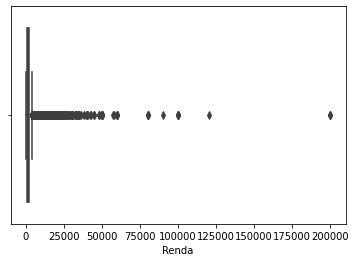

In [42]:
print('Não, pois a média é muito sensível a outliers e a variável rendimento apresenta muito outliers. O boxplot abaixo nos ajuda a vizualizar esses outliers')

sns.boxplot(data = df, x ='Renda')

**Após a coleta dos dados, você foi indagado sobre o impacto do tempo de estudo na renda dos brasileiros.**

## (0,25)

Com base no conjunto de dados, calcule medidas de tendência central, de dispersão e os intervalos quartis da variável `Renda` para cada nível de `escolaridade`.

In [43]:
notas.append(0.25)

In [44]:
df_agrupado_escolaridade = df.groupby('Escolaridade')[['Renda']].mean()
df_agrupado_escolaridade.columns = ['Média Renda']

df_agrupado_escolaridade['Mediana Renda'] = df.groupby('Escolaridade')[['Renda']].median()
df_agrupado_escolaridade['Moda Renda'] = df.groupby('Escolaridade')[['Renda']].agg(pd.Series.mode)
df_agrupado_escolaridade['Desvio Padrão'] = df.groupby('Escolaridade')[['Renda']].std()
df_agrupado_escolaridade['1° Quartil'] = df.groupby('Escolaridade')[['Renda']].quantile(0.25)
df_agrupado_escolaridade['2° Quartil'] = df.groupby('Escolaridade')[['Renda']].quantile(0.50)
df_agrupado_escolaridade['3° Quartil'] = df.groupby('Escolaridade')[['Renda']].quantile(0.75)

df_agrupado_escolaridade



,Média Renda,Mediana Renda,Moda Renda,Desvio Padrão,1° Quartil,2° Quartil,3° Quartil
Escolaridade,,,,,,,
0 - Sem instrução,732.994187,600.0,0,955.274843,180.0,600.0,1000.0
1 - Fund. I incompleto,897.019279,788.0,788,1588.779043,320.0,788.0,1100.0
2 - Fund. I completo,1150.439293,900.0,788,1293.144934,560.0,900.0,1500.0
3 - Fund. II incompleto,1238.560884,1000.0,788,1315.349041,788.0,1000.0,1500.0
4 - Fund. II completo,1437.744862,1100.0,788,1404.280340,788.0,1100.0,1600.0
5 - Médio incompleto,1412.122537,1050.0,788,1852.825333,788.0,1050.0,1576.0
6 - Médio completo,1841.671287,1350.0,788,2457.197657,900.0,1350.0,2000.0
7 - Superior incompleto,2629.527362,1800.0,2000,3255.689938,1100.0,1800.0,3000.0
8 - Superior completo,5242.443353,3500.0,5000,6450.490806,2000.0,3500.0,6000.0


## (0,25)

Analisando as médias e desvios padrão acima, você consegue afirmar que o salário sempre aumenta quanto maior o tempo de estudo? Justifique.

ps: Não é necessário fazer contas.

>

In [45]:
notas.append(0.25)

In [46]:
print('''Podemos ver que existe uma tendência para o aumento da média salarial, porém, 
ao mesmo tempo, vemos que a medidade de disperção também cresce de forma proporcional. 
Podemos afimar que a tendência é aumentar, mas isso não será verdade em todos os casos ''')

Podemos ver que existe uma tendência para o aumento da média salarial, porém, 
ao mesmo tempo, vemos que a medidade de disperção também cresce de forma proporcional. 
Podemos afimar que a tendência é aumentar, mas isso não será verdade em todos os casos 


## (0,10)

Os valores da média e desvio padrão encontrados acima se referem à população? Justifique.

>

In [47]:
notas.append(0.10)

In [48]:
print('Não. Eles se referem a uma amostra da população brasileira.')

Não. Eles se referem a uma amostra da população brasileira.


##### **Como a quantidade de pessoas em cada nível de escolaridade varia bastante e, por ser inviável realizar outra pesquisa para conseguir mais dados, você, ex-aluno do Prof. Carrasco, realizará um teste estátisco para responder à questão sobre a impacto do estudo na renda.**

## (0,25)

Observado que as variâncias de renda em cada um dos níveis é muito grande, calcule o tamanho amostral de cada grupo para assegurar que o erro inferencial da média populacional estimada em cada um dos níveis seja no máximo R\\$150,00 com confiança de 94,25\%.

Resultado esperado: `print(nivel, n)` para cada nível.
 

In [49]:
notas.append(0.25)

In [50]:
lista_n = []

for index in df_agrupado_escolaridade.index:
    confianca = 0.9425
    significancia = 1 - confianca
    probabilidade = confianca + (significancia)/ 2

    df_temporario = df_agrupado_escolaridade[df_agrupado_escolaridade.index == index]

    z = norm.ppf(probabilidade)
    media_amostral = df_temporario['Média Renda'][0]
    desvio_pad = df_temporario['Desvio Padrão'][0] 
    erro = 150

    n = (z * (desvio_pad / erro))**2
    lista_n.append(n)
    
    print(f'{index}, {n}')


0 - Sem instrução, 146.33508552929874
1 - Fund. I incompleto, 404.77976040229794
2 - Fund. I completo, 268.15517948545187
3 - Fund. II incompleto, 277.4430236339121
4 - Fund. II completo, 316.2273405454258
5 - Médio incompleto, 550.5043365055725
6 - Médio completo, 968.2153626012527
7 - Superior incompleto, 1699.72185492212
8 - Superior completo, 6672.326738884706


## (0,10)

Você deve ter encontrado tamanhos amostrais diferentes para cada um dos níveis de escolaridade. Para evitar problemas de desbalanceamento de classes em análises futuras, usaremos o maior valor encontrado como o tamanho amostral de todas as classes. Esse valor deve ser armazendado na variável `sample_size`.

Por que fizemos essa escolha?

In [51]:
notas.append(0.1)

In [52]:
sample_size = np.max(lista_n)
sample_size = int(round(sample_size, 0))
print(f'\n O tamanho amostral é {sample_size}.')


 O tamanho amostral é 6672.


In [53]:
print('Para que seja possível comparar os resultados de cada um dos níveis de escolaridade sem problemas no futuro.')

Para que seja possível comparar os resultados de cada um dos níveis de escolaridade sem problemas no futuro.


## (0,10)

Qual tipo de desvio padrão foi utilizado para calcular os tamanhos amostrais: amostral ou populacional? Justifique sua escolha.

> 

In [54]:
notas.append(0.1)

In [55]:
print('Amostral, pois não temos acesso ao desvio padrão populacional')

Amostral, pois não temos acesso ao desvio padrão populacional


## (0,10)

Qual expressão para o cálculo de `n` foi utilizada: finito ou infinito? Justifique.

> 

In [56]:
notas.append(0.1)

In [57]:
print('''Infinito, pois o conjunto trata das pessoas economicamente ativa do Brasil, 
e 77 mil não é um tamanho amostral grande o suficiente para considerar a população finita.''')

Infinito, pois o conjunto trata das pessoas economicamente ativa do Brasil, 
e 77 mil não é um tamanho amostral grande o suficiente para considerar a população finita.


## (0,25)

Crie um dataframe com `sample_size` amostras para cada nível de escolaridade.

Use `random_state=5`.

<details>
    <summary>💪 Desafio (clique aqui) 💪</summary>

Consegue pensar em como criar os 9 dataframes em 1 ou 2 linhas? 

ps: **Não** serão descontados pontos de quem não cumprir o desafio!
    
</details>    

In [58]:
notas.append(0.25)

In [59]:
#Desafios
amostras_por_nivel = [sample(list(df[df['Escolaridade'] == index]['Renda']), k = sample_size) if (sample_size < len(list(df[df['Escolaridade'] == index]['Renda']))) else sample(list(df[df['Escolaridade'] == index]['Renda']), k = len(list(df[df['Escolaridade'] == index]['Renda']))) for index in df_agrupado_escolaridade.index]

In [60]:
amostras_por_nivel = {}

for index in df_agrupado_escolaridade.index:
    df_temp = df[df['Escolaridade'] == index]['Renda']
    
    amostras_por_nivel[index] = df_temp.sample(n = sample_size, random_state = 5, replace = True)

## (0,25)

Calcule a media e desvio amostrais e o erro inferencial de cada uma das amostras criadas acima.

Resultado esperado: `print([nivel, media_amostral, desvio_amostral, erro_inferencial])` para cada nível.

In [61]:
notas.append(0.25)

In [62]:
dados_amostras = []

for index in df_agrupado_escolaridade.index:
    confianca = 0.9425
    significancia = 1 - confianca
    probabilidade = confianca + (significancia)/ 2

    z = norm.ppf(probabilidade)
    media_amostral = np.mean(amostras_por_nivel[index])
    desvio_pad =  np.std(amostras_por_nivel[index])
    n = len(amostras_por_nivel[index])

    erro = z * (desvio_pad / np.sqrt(n))
    
    dados_amostras.append([index, media_amostral, desvio_pad, erro, n])
    print(dados_amostras[-1][:-1])

['0 - Sem instrução', 735.9737709832134, 933.3980226926107, 21.705810585146633]
['1 - Fund. I incompleto', 890.8193944844124, 1558.8757566290742, 36.25105375899324]
['2 - Fund. I completo', 1154.3742505995203, 1327.8852079054645, 30.879457745654644]
['3 - Fund. II incompleto', 1206.4554856115108, 1136.39221235832, 26.426362079415508]
['4 - Fund. II completo', 1457.2267685851318, 1446.0945319613702, 33.62836992992729]
['5 - Médio incompleto', 1391.154376498801, 1578.8427350572938, 36.71537813207301]
['6 - Médio completo', 1845.1468824940048, 1940.9374444009811, 45.13575077463017]
['7 - Superior incompleto', 2587.7366606714627, 3391.7634494624226, 78.8741492844366]
['8 - Superior completo', 5086.555005995204, 5546.319401175165, 128.97751595760377]


**Estamos prontos para testar nossa hippótese de que, quanto mais anos de estudo, maior o salário. Para isso, vamos análisar se ocorre um aumento significativo de renda entre dois níveis de instrução, conforme definidos no começo da aula.**

**Exemplo:** 
1. Comparar renda média do grupo `0 - Sem instrução` com o grupo `1 - Fund. I incompleto`. 
2. Comparar renda média do grupo `1 - Fund. I incompleto` com o grupo `2 - Fund. I completo`.
3. E assim por diante....

## (1,0)

Para cada dois níveis de escolaridade consecutivos, teste se as médias de renda são iguais com nível de confiança de 99%.  

Resultado esperado para cada comparação. Imprimir as seguintes informações (as opções dos termos entre paraenteses dependem das suas escolhas):

* H_0: Renda de pessosas `nivel[i]` **(= ou !=)** `nivel[i+1]`.
* [(**t ou z)**, p] 
* **(Aceitar ou Rejeitar)** H_0. 

<details>
    <summary>🙆‍♂️ Dica (clique aqui) 🙋‍</summary>

Você terá que repetir o mesmo cálculo diversas vezes. Use o poder do computador e escreva sua solução de forma genérica, de tal forma que você possa mudar os parâmetros necessários para realizar novos cálculos rapidamente.   
</details>    

In [63]:
notas.append(1)

In [64]:
confianca = 0.99
significancia = 1 - confianca
probabilidade = confianca + significancia/2

for i in range(len(dados_amostras) - 1):
    
    z_alpha_2 = norm.ppf(probabilidade)
    z = (dados_amostras[i][1] - dados_amostras[i+1][1]) / np.sqrt((dados_amostras[i][2]**2/sample_size)+(dados_amostras[i+1][2]**2/sample_size))

    if z > 0:
        p =(1 - norm.cdf(z)) * 2
    else:
        p = norm.cdf(z) * 2

    
    print(f'\nH_0: Renda de Pessoas {dados_amostras[i][0]} = {dados_amostras[i + 1][0]}')
    print([z, p])
    
    if (z <= -z_alpha_2) or (z >= z_alpha_2):
        print('Rejeitar H_0')
    else:
        print('Aceitar H_0')


H_0: Renda de Pessoas 0 - Sem instrução = 1 - Fund. I incompleto
[-6.961178675853382, 3.3743746863516812e-12]
Rejeitar H_0

H_0: Renda de Pessoas 1 - Fund. I incompleto = 2 - Fund. I completo
[-10.512773491022031, 7.544166450628496e-26]
Rejeitar H_0

H_0: Renda de Pessoas 2 - Fund. I completo = 3 - Fund. II incompleto
[-2.4340382575958937, 0.01493141682333493]
Aceitar H_0

H_0: Renda de Pessoas 3 - Fund. II incompleto = 4 - Fund. II completo
[-11.13735331033395, 8.253578287646575e-29]
Rejeitar H_0

H_0: Renda de Pessoas 4 - Fund. II completo = 5 - Médio incompleto
[2.520744809888757, 0.011710674610439398]
Aceitar H_0

H_0: Renda de Pessoas 5 - Médio incompleto = 6 - Médio completo
[-14.821431178130988, 1.0649112154718014e-49]
Rejeitar H_0

H_0: Renda de Pessoas 6 - Médio completo = 7 - Superior incompleto
[-15.521690425658113, 2.4744543678864546e-54]
Rejeitar H_0

H_0: Renda de Pessoas 7 - Superior incompleto = 8 - Superior completo
[-31.3955848705291, 2.324569391938792e-216]
Rejeitar

## (0,25)

Quais suas conclusões sobre os resultados encontrados?

> 

In [65]:
notas.append(0.25)

In [66]:
print('Que o grau de estudo tem um impacto sim na renda, ainda não podemos dizer com certeza qual é esse impacto, mas podemos dizer que ele existe.')

Que o grau de estudo tem um impacto sim na renda, ainda não podemos dizer com certeza qual é esse impacto, mas podemos dizer que ele existe.


## (0,5)

No exercício acima avaliamos se as médias de renda entre dois grupos são iguais ou diferentes, mas isso não diz muito sobre qual grupo ganha mais. Reformule sua hipótese inicial assumindo que o grupo com menor nível de escolaridade ganhe menos que o grupo seguinte com significância de 1%.

Resultado esperado para cada comparação. Imprimir as seguintes informações (as opções dos termos entre paraenteses dependem das suas escolhas):

* H_0: Renda de pessosas `nivel[i]` **(<= ou >= ou < ou >)** `nivel[i+1]`.
* [(**t ou z)**, p] 
* **(Aceitar ou Rejeitar)** H_0. 

In [67]:
notas.append(0.5)

In [68]:
confianca = 0.99
significancia = 1 - confianca
probabilidade = confianca

for i in range(len(dados_amostras) - 1):
    
    z_alpha = norm.ppf(probabilidade)
    z = (dados_amostras[i][1] - dados_amostras[i+1][1]) / np.sqrt((dados_amostras[i][2]**2/sample_size)+(dados_amostras[i+1][2]**2/sample_size))

    p = 1 -  norm.cdf(z) 
    
    print(f'\nH_0: Renda de Pessoas {dados_amostras[i][0]} <= {dados_amostras[i + 1][0]}')
    print([z, p])
    
    if (z >= z_alpha):
        print('Rejeitar H_0')
    else:
        print('Aceitar H_0')


H_0: Renda de Pessoas 0 - Sem instrução <= 1 - Fund. I incompleto
[-6.961178675853382, 0.9999999999983128]
Aceitar H_0

H_0: Renda de Pessoas 1 - Fund. I incompleto <= 2 - Fund. I completo
[-10.512773491022031, 1.0]
Aceitar H_0

H_0: Renda de Pessoas 2 - Fund. I completo <= 3 - Fund. II incompleto
[-2.4340382575958937, 0.9925342915883325]
Aceitar H_0

H_0: Renda de Pessoas 3 - Fund. II incompleto <= 4 - Fund. II completo
[-11.13735331033395, 1.0]
Aceitar H_0

H_0: Renda de Pessoas 4 - Fund. II completo <= 5 - Médio incompleto
[2.520744809888757, 0.005855337305219699]
Rejeitar H_0

H_0: Renda de Pessoas 5 - Médio incompleto <= 6 - Médio completo
[-14.821431178130988, 1.0]
Aceitar H_0

H_0: Renda de Pessoas 6 - Médio completo <= 7 - Superior incompleto
[-15.521690425658113, 1.0]
Aceitar H_0

H_0: Renda de Pessoas 7 - Superior incompleto <= 8 - Superior completo
[-31.3955848705291, 1.0]
Aceitar H_0


## (0,25)

Quais suas conclusões sobre os resultados encontrados?

> 

In [69]:
notas.append(0.25)

In [70]:
print('Que o grau de instrução tem sim uma correlação positiva com a renda.')

Que o grau de instrução tem sim uma correlação positiva com a renda.


## (0,5)

Qual seria sua recomendação de resultados sobre o impacto do tempo de estudo na renda dos brasileiros? Escreva de forma resumida sua conclusão, pontos de atenção e sugestões, caso necessário. 

In [71]:
notas.append(0.25)

In [72]:
print('''Com um grau de confiança de 99% existe um correlação positiva entre o tempo de estudo e a renda dos brasileiros. 
Uma recomendação é conseguir amostras maiores em alguma seções da população, pois algumas acabaram tendo um tamanho amostral 
menor do que o necessário e foi necessário fazer um processo de amostragem com reposição''')

Com um grau de confiança de 99% existe um correlação positiva entre o tempo de estudo e a renda dos brasileiros. 
Uma recomendação é conseguir amostras maiores em alguma seções da população, pois algumas acabaram tendo um tamanho amostral 
menor do que o necessário e foi necessário fazer um processo de amostragem com reposição


> 

## (1,0)

Enquanto estava realizando a análise acima, um colega de trabalho lhe apresentou 4 opções de solução, que você pensou em usar para validar seus cálculos. Contudo, ele, que não foi aluno do Dr. Carrasco, foi demitido pela baixa qualidade de trabalho e, ao olhar as notas dele, você entendeu o porquê.

---
**Relatório de testes de hipóteses da renda.**

``` python
nivel_1 = media de renda para nível Fund. II completo   
nivel_2 = media de renda para nível Médio incompleto

1.
ztest(nivel_1, nivel_2, alternative='larger')
(2.5205558980730096, 0.005858481326660286)

2.
ztest(nivel_2, nivel_1, alternative='smaller')
(-2.5205558980730096, 0.005858481326660286)

3.
ztest(nivel_1, nivel_2, alternative='two-sided')
(2.5205558980730096, 0.011716962653320572)

4.
ztest(nivel_1, nivel_2, alternative='smaller')
(-2.5205558980730096, 0.9941415186733397)
````
--- 

Defina para cada caso as hipóteses nula e alternativa bem como a aceitação ou rejeição da hipótese nula com um nível de significância de 5%.

In [73]:
notas.append(1)

In [74]:
from statsmodels.stats.weightstats import ztest
def testa_p (p, significancia):
    if p >= significancia:
        return 'Aceitar H_0'
    else:
        return 'Rejeitar H_0'

print('\nH_0: Renda Fund. II completo <= Renda Médio Incompleto')
print('H_1: Renda Fund. II completo > Renda Médio Incompleto')
z, p = ztest(amostras_por_nivel['4 - Fund. II completo'], amostras_por_nivel['5 - Médio incompleto'], alternative='larger')
print(testa_p(p, 0.05))

print('\nH_0: Renda Médio Incompleto >= Renda Fund. II completo')
print('H_1: Renda Médio Incompleto < Renda Fund. II completo')
z, p = ztest(amostras_por_nivel['5 - Médio incompleto'], amostras_por_nivel['4 - Fund. II completo'], alternative='smaller')
print(testa_p(p, 0.05))

print('\nH_0: Renda Fund. II completo = Renda Médio Incompleto')
print('H_1: Renda Fund. II completo != Renda Médio Incompleto')
z, p = ztest(amostras_por_nivel['4 - Fund. II completo'], amostras_por_nivel['5 - Médio incompleto'], alternative='two-sided')
print(testa_p(p, 0.05))

print('\nH_0: Renda Fund. II completo >= Renda Médio Incompleto')
print('H_1: Renda Fund. II completo < Renda Médio Incompleto')
z, p = ztest(amostras_por_nivel['4 - Fund. II completo'], amostras_por_nivel['5 - Médio incompleto'], alternative='smaller')
print(testa_p(p, 0.05))


H_0: Renda Fund. II completo <= Renda Médio Incompleto
H_1: Renda Fund. II completo > Renda Médio Incompleto
Rejeitar H_0

H_0: Renda Médio Incompleto >= Renda Fund. II completo
H_1: Renda Médio Incompleto < Renda Fund. II completo
Rejeitar H_0

H_0: Renda Fund. II completo = Renda Médio Incompleto
H_1: Renda Fund. II completo != Renda Médio Incompleto
Rejeitar H_0

H_0: Renda Fund. II completo >= Renda Médio Incompleto
H_1: Renda Fund. II completo < Renda Médio Incompleto
Aceitar H_0


**Vamos analisar alguns dados sobre o acesso de diferentes raças à educação.**

A tabela abaixo mostra as probabilidades para o seguinte diagrama.

![image.png](diagrama_pessoas.png)

![dataframe.png](dataframe.png)

## (0,5)

O que as variáveis P_C e P_NC significam?

> 

In [75]:
notas.append(0.5)

In [76]:
print('''P_C é a chance de ao pegar uma pessoa aleatória ela ser de uma dada cor.
PN_C é a chance de ao pegar uma pessoa aleatória de uma cor já sabida, ela ter um dado grau de formação.''')

P_C é a chance de ao pegar uma pessoa aleatória ela ser de uma dada cor.
PN_C é a chance de ao pegar uma pessoa aleatória de uma cor já sabida, ela ter um dado grau de formação.


## (0,5)

Se selecionarmos uma pessoa ao acaso, qual a chance dela ser `parda` e ter nível superior completo? Qual a chance no caso dela ser `branca`?

In [77]:
notas.append(0.5)

In [78]:
print('A chance de ao selecionar uma pessoa ao acaso ela ser parda e ter nível superior completo é de 4.14%')
print('A chance de ao selecionar uma pessoa ao acaso ela ser branca e ter nível superior completo é de 8.82%')

A chance de ao selecionar uma pessoa ao acaso ela ser parda e ter nível superior completo é de 4.14%
A chance de ao selecionar uma pessoa ao acaso ela ser branca e ter nível superior completo é de 8.82%


## (0,25)

Qual a chance das pessoas dessas mesmas raças terem apenas o ensino fundamental I completo?

In [79]:
notas.append(0)

In [80]:
print('A chance de ao selecionar uma pessoa parda ao acaso ela e ela ter ensino fundamental I é de 43.17%')
print('A chance de ao selecionar uma pessoa branca ao acaso ela e ela ter ensino fundamental I é de 84.50%')

A chance de ao selecionar uma pessoa parda ao acaso ela e ela ter ensino fundamental I é de 43.17%
A chance de ao selecionar uma pessoa branca ao acaso ela e ela ter ensino fundamental I é de 84.50%


## (0,25)
Se pegarmos uma pessoa aleatória, qual a chance dela ser indigena e ter terminado o ensino médio?

In [81]:
notas.append(0.25)

In [82]:
print('A chance de ao selecionar uma pessoa ao acaso ela ser indígena e ter nível médio completo é de 0.11%')

A chance de ao selecionar uma pessoa ao acaso ela ser indígena e ter nível médio completo é de 0.11%


## (0,5)

Se pegarmos uma pessoa aleatória que estudou até o ensino médio, qual a chance dela ser indigena?

In [83]:
notas.append(0.25)

In [84]:
total = 0.001070 + 0.115305 + 0.031612 + 0.001148 + 0.262898
chance = 0.001070/total

print(f'A chance de pegarmos uma pessoa aleatória que estudou até o ensino médio, a chance dela ser indigena é de {chance * 100 :.2f}%')

A chance de pegarmos uma pessoa aleatória que estudou até o ensino médio, a chance dela ser indigena é de 0.26%


## (0,5)

Por que as probabilidades acima são diferentes? Explique com suas palavras.

> 

In [85]:
notas.append(0.5)

In [86]:
print('''Isso ocorre por conta da informação inicial que nós temos no segundo exemplo, nele já sabemos que a pessoa que selecionada já 
concluiu o ensino médio, por conta disso vamos trabalhar apenas com o universo de pessoas que concluiram o ensino médio. No primeiro
exemplo não temos essa informação inicial e, por conta disso, trabalhamos com todo o universo de pessoas.''')

Isso ocorre por conta da informação inicial que nós temos no segundo exemplo, nele já sabemos que a pessoa que selecionada já 
concluiu o ensino médio, por conta disso vamos trabalhar apenas com o universo de pessoas que concluiram o ensino médio. No primeiro
exemplo não temos essa informação inicial e, por conta disso, trabalhamos com todo o universo de pessoas.


# Sistemas lineares

A **regressão linear** é uma ferramenta importantissíma no dia-a-dia de uma pessoa que trabalha com dados. Enquanto não estudamos a fundo suas propriedades e alguns métodos eficientes para o cálculo, vamos ver o que acontece 'por baixo dos panos'.

Para isso, vamos encontrar um polinômio de 3º grau que passe pelos pontos(−1, 4), (0, -3),
(3, 2) e (4, 5).

**Atenção:** Tente resolver o problema **antes** de olhar as dicas!

## (0,1)

Escreva uma equação genérica do 3º grau com coeficientes a,b,c,d.

<details>
    <summary>🙆‍♂️ Dica 🙋‍</summary>

Econtrou algo parecido com: $y = f(x) = ax^3 + bx^2 + cx + d$ ? 
    
</details> 



In [87]:
notas.append(0.1)

In [88]:
def polinomio_3_grau (x, a = 1, b = 1, c = 1, d = 1):
    y = a*x**3 + b*x**2 + c*x + d

    return y

## (0,1)

Represente os pontos num sistema de coordenadas bi-dimensional. 

<details>
    <summary>🙆‍♂️ Dica 🙋‍</summary>

Crie dois vetores, x e y, e faça um scatterplot.    
</details>    

In [89]:
notas.append(0.1)

<AxesSubplot:>

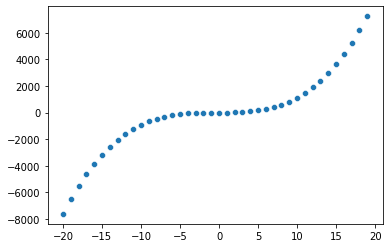

In [90]:
lista_x = [i for i in range(-20, 20, 1)]

lista_y = [polinomio_3_grau(x) for x in lista_x]

sns.scatterplot(x = lista_x, y = lista_y)

## (0,3)

Escreva o sistema de equações lineares para o problema.

<details>
    <summary>🙆‍♂️ Dica 🙋‍</summary>

Substitua os valores de x e y na expressão acima. 
    
</details>    

<details>
    <summary>🙆‍♂️ Resultado  🙋‍</summary>

$\begin{equation} \begin{cases}
-a + b - c + d = 0\\  
d = 1 \\
27a + 9b + 3c + d = -1\\
64a + 16b +4c + d = 0
\end{cases} \end{equation}$
    
</details>    



In [91]:
notas.append(0.3)

In [92]:
(−1, 4), (0, -3), (3, 2) e (4, 5)

SyntaxError: invalid character in identifier (Temp/ipykernel_8372/970536664.py, line 1)

In [ ]:
4 = - a + b - c + d
-3 = d
2 = a*27 + b*9 + c*3 + d
5 = a*64 + b*16 + c*4 + d


## (0,3)

Reescreva o sistema na forma matricial.

<details>
    <summary>🙆‍♂️ Resposta 🙋‍</summary>

$\begin{bmatrix}
-1 & 1 & -1 & 1 \\
0 & 0 & 0 & 1 \\
27 & 9 & 3 & 1 \\
64 & 16 & 4 & 1
\end{bmatrix}
\begin{bmatrix}
a \\ b \\ c \\ d
\end{bmatrix}
= \begin{bmatrix}
0 \\ 1 \\ -1 \\ 0
 \end{bmatrix}$
    
</details>   

In [93]:
notas.append(0.3)

In [94]:
A = [[-1, 1, -1, 1],
     [0, 0, 0, 1],
     [27, 9, 3, 1],
     [64, 16, 4, 1]]

# X = [[a],
#      [b],
#      [c],
#      [d]]

Y = [[4],
     [-3],
     [2],
     [5]]

A = np.array(A)
Y = np.array(Y)

## (0,5)

Resolva o sistema. 

In [95]:
notas.append(0.5)

In [96]:
A_inv = np.linalg.inv(A)
X = np.dot(A_inv, Y)
X

array([[-0.36666667],
       [ 2.9       ],
       [-3.73333333],
       [-3.        ]])

## (0,1)

Reescreva o polinômio, substituindo a,b,c e d por seus respectivos valores.

<details>
    <summary>🙆‍♂️ Resposta 🙋‍</summary>

Substitua os valores de x e y na expressão acima. Você deve encontrar:  
$y = p(x) = -0.36666667x^3 - + 2.9x^2 - 3.73333333x - 3$   
</details>   

In [97]:
notas.append(0.1)

In [98]:
#y = -0.36666667*x**3 - + 2.9*x**2 - 3.73333333*x - 3 

def polinomio_3_grau (x, a = -0.36666667, b = 2.9, c = -3.73333333, d = -3):
    y = a*x**3 + b*x**2 + c*x + d

    return y

## (0,1)
Crie uma função que represente o polinômio acima. Em substitua os valores de x para calcular y. O resultado encontrado é igual ao do começo do problema?

In [99]:
notas.append(0.1)

Não, mudou completamente.


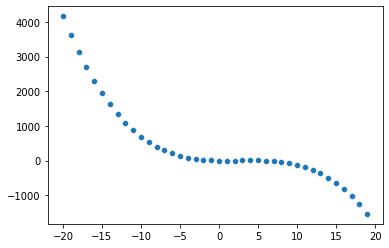

In [101]:
lista_x = [i for i in range(-20, 20, 1)]

lista_y = [polinomio_3_grau(x) for x in lista_x]

sns.scatterplot(x = lista_x, y = lista_y)

print('Não, mudou completamente.')

## (0,5)

De forma simplificada, acabamos de realizar um cálculo muito similar ao que ocorre na **regressão linear**, onde precisamos encontrar os coeficientes que satisfazem um conjuto de equações de acordo com os dados do problema.

Note que encontramos os coeficientes de um polinômio de 3º grau usando sistemas lineares. Se isso está correto, por que ainda dizemos **sistemas lineares**?

In [102]:
notas.append(0.5)

In [103]:
print('''Por que, na verdade, descobrir os coeficientes já sabendo o x é um sistema linar. Quando nos livramos 
do x (quando o x é conhecido), o sistema de equações para descobrir os coeficientes é um sistema linear.''')

Por que, na verdade, descobrir os coeficientes já sabendo o x é um sistema linar. Quando nos livramos 
do x (quando o x é conhecido), o sistema de equações para descobrir os coeficientes é um sistema linear.


In [104]:
np.sum(notas)

11.12